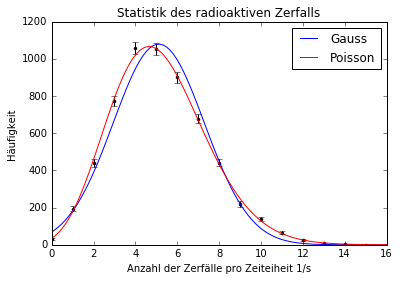

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
#Die Messdaten werden in Python importiert
anzahl, haeufigkeit=np.loadtxt('C:/Users/admin/Desktop/Neuer Ordner/maundilja2.dat', unpack=True, skiprows=0, ndmin=2)
fehler=np.sqrt(haeufigkeit)
#Die Messdaten werden geplottet
plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".", color="black")
from numpy import exp, pi, sqrt
#Die Gaußfunktion wird an die Messdaten angefittet und geplottet
def gaussian(x,A,mu,sig): #A: Fläche der Gaussfuktion
    return A/(sqrt(2*pi)*sig)*exp(-(x-mu)**2/2/sig**2)
popt, pcov=curve_fit(gaussian,anzahl[:-4], haeufigkeit[:-4], p0=[2000,5,2], sigma=fehler[:-4])
x=np.linspace(0,16,100)
plt.plot(x,gaussian(x,*popt), label='Gauss')
#Die Poissonfunktion wird an die Messdate angefittet und geplottet
from scipy.special import gamma
def poisson(x, A_p, mu_p):
    return A_p*exp(-mu_p)*mu_p**x/gamma(x+1)
popt_p, pcov_p=curve_fit(poisson, anzahl[:-4], haeufigkeit[:-4], p0=[2000,5], sigma=fehler[:-4])
plt.xlabel('Anzahl der Zerfälle pro Zeiteiheit 1/s')
plt.ylabel('Häufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')
plt.plot(x, poisson(x, *popt_p), label='Poisson', color='r')
plt.legend()


(1, 10000)

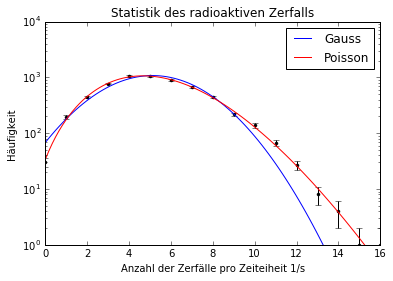

In [25]:
#Das Gleiche wird logarithmisch geplottet
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
#Die Messdaten werden in Python importiert
anzahl, haeufigkeit=np.loadtxt('C:/Users/admin/Desktop/Neuer Ordner/maundilja2.dat', unpack=True, skiprows=0, ndmin=2)
fehler=np.sqrt(haeufigkeit)
#Die Messdaten werden geplottet
plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".", color="black")
from numpy import exp, pi, sqrt
#Die Gaußfunktion wird an die Messdaten angefittet und geplottet
def gaussian(x,A,mu,sig): #A: Fläche der Gaussfuktion
    return A/(sqrt(2*pi)*sig)*exp(-(x-mu)**2/2/sig**2)
popt, pcov=curve_fit(gaussian,anzahl[:-4], haeufigkeit[:-4], p0=[2000,5,2], sigma=fehler[:-4])
x=np.linspace(0,16,100)
plt.plot(x,gaussian(x,*popt), label='Gauss')
#Die Poissonfunktion wird an die Messdate angefittet und geplottet
from scipy.special import gamma
def poisson(x, A_p, mu_p):
    return A_p*exp(-mu_p)*mu_p**x/gamma(x+1)
popt_p, pcov_p=curve_fit(poisson, anzahl[:-4], haeufigkeit[:-4], p0=[2000,5], sigma=fehler[:-4])
plt.xlabel('Anzahl der Zerfälle pro Zeiteiheit 1/s')
plt.ylabel('Häufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')
plt.plot(x, poisson(x, *popt_p), label='Poisson', color='r')
plt.legend()
plt.yscale('log')
plt.ylim(1,10000)

In [10]:
#Fitparameter werden zusammen mit den aus der beim fitten erhaltener Kovariazmatrix ausgerechneten Standardfehler angegeben 
print("Gaussfit:")
print("A=",popt[0], ", Stadartfehler=", np.sqrt(pcov[0][0]))
print("mu=",popt[1], ", Stadartfehler=", np.sqrt(pcov[1][1]))
print("sig=",popt[2], ", Stadartfehler=", np.sqrt(pcov[2][2]))
print("Poissonfit:")
print("A_p=",popt_p[0], ", Stadartfehler=", np.sqrt(pcov_p[0][0]))
print("mu_p=",popt_p[1], ", Stadartfehler=", np.sqrt(pcov_p[1][1]))


Gaussfit:
A= 5897.19830349 , Stadartfehler= 300.540207091
mu= 5.11687530199 , Stadartfehler= 0.114500586812
sig= 2.18022606912 , Stadartfehler= 0.0863278537564
Poissonfit:
A_p= 6025.85836353 , Stadartfehler= 74.8391047381
mu_p= 5.16718107498 , Stadartfehler= 0.0287001796875


In [14]:
#Hier werden Chi^2 Summen und reduzierte Chi^2 Summen ausgerechnet 
#Gauss:
chi2_g=np.sum((gaussian(anzahl[:-4], *popt)-haeufigkeit[:-4])**2/fehler[:-4])
dof_g=len(anzahl[:-4])-3 #dof: degrees of freedom, Freiheitsgrade
chi2_red_g=chi2_g/dof_g
print("chi2_g=", chi2_g)
print("chi2_red_g",chi2_red_g)
#Poisson
chi2_p=np.sum((poisson(anzahl[:-4], *popt_p)-haeufigkeit[:-4])**2/fehler[:-4])
dof_p=len(anzahl[:-4])-3 #dof: degrees of freedom, Freiheitsgrade
chi2_red_p=chi2_p/dof_p
print("chi2_p=", chi2_p)
print("chi2_red_p",chi2_red_p)



chi2_g= 2094.09659058
chi2_red_g 209.409659058
chi2_p= 174.356499929
chi2_red_p 17.4356499929


In [22]:
#Hier wird die "Fitwahrscheinlichkeit" ausgerechnet
from scipy.stats import chi2
#Gauss
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100
#Poisson
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100
print("Wahrscheinlichkeit Gauss=", prob_g,"%")
print("Wahrscheinlichkeit poisson=", prob_p,"%")

Wahrscheinlichkeit Gauss= 0.0 %
Wahrscheinlichkeit poisson= 0.0 %
